In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder

In [155]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [156]:
fire = pd.read_csv('/content/drive/MyDrive/UnemploymentProject/CleanDatasets/binned_fire.csv')
fire.head()

,Month,Year,State,County,Fire_Size,Rate,Number of Employees,CPI,Interest Rate,NumWorkStoppages,NumWorkersInStoppages,WorkStoppagesTotalDays,Log_Fire_Size,Log10_Fire_Size,Sqrt_Fire_Size,Crt_Fire_Size,Log_Fire_Size_Bin,Date
0,1,1992,AL,Calhoun,8.0,8.7,106723.0,138.1,4.03,35,363,3989,2.079442,0.90309,2.828427,2.000000,Bin 2,1992-01-01
1,1,1992,NC,Wilkes,4.0,5.3,106723.0,138.1,4.03,35,363,3989,1.386294,0.60206,2.000000,1.587401,Bin 1,1992-01-01
2,1,1992,NC,Wayne,10.0,7.8,106723.0,138.1,4.03,35,363,3989,2.302585,1.00000,3.162278,2.154435,Bin 2,1992-01-01
3,1,1992,NC,Watauga,4.0,5.2,106723.0,138.1,4.03,35,363,3989,1.386294,0.60206,2.000000,1.587401,Bin 1,1992-01-01
4,1,1992,NC,Warren,2.0,12.0,106723.0,138.1,4.03,35,363,3989,0.693147,0.30103,1.414214,1.259921,Bin 1,1992-01-01


In [157]:
bin_5_data = fire[fire['Log_Fire_Size_Bin'] == "Bin 5"]
bin_5_data.head()

,Month,Year,State,County,Fire_Size,Rate,Number of Employees,CPI,Interest Rate,NumWorkStoppages,NumWorkersInStoppages,WorkStoppagesTotalDays,Log_Fire_Size,Log10_Fire_Size,Sqrt_Fire_Size,Crt_Fire_Size,Log_Fire_Size_Bin,Date
56,1,1992,NC,Pender,656.0,9.0,106723.0,138.1,4.03,35,363,3989,6.486161,2.816904,25.612497,8.688963,Bin 5,1992-01-01
57,1,1992,NC,Onslow,125.0,6.0,106723.0,138.1,4.03,35,363,3989,4.828314,2.096910,11.180340,5.000000,Bin 5,1992-01-01
76,1,1992,SD,Custer,400.0,5.5,106723.0,138.1,4.03,35,363,3989,5.991465,2.602060,20.000000,7.368063,Bin 5,1992-01-01
86,1,1992,SC,Orangeburg,123.5,9.4,106723.0,138.1,4.03,35,363,3989,4.816241,2.091667,11.113055,4.979919,Bin 5,1992-01-01
90,1,1992,SD,Todd,266.0,8.5,106723.0,138.1,4.03,35,363,3989,5.583496,2.424882,16.309506,6.431228,Bin 5,1992-01-01


In [158]:
# for index, row in bin_5_data.iterrows():
#     year = row['Year']
#     county = row['County']
#     month = row['Month']

#     for months_prev in [1, 2, 3]:
#         if month - months_prev <= 0:
#             prev_month = 12 + (month - months_prev)
#             prev_year = year - 1
#         else:
#             prev_month = month - months_prev
#             prev_year = year
#         prev_rate = bin_5_data[(bin_5_data['Year'] == prev_year) &
#                    (bin_5_data['County'] == county) &
#                    (bin_5_data['Month'] == prev_month)]['Rate']

#         if not prev_rate.empty:
#             bin_5_data.at[index, f'Rate_{months_prev}M_Prev'] = prev_rate.iloc[0]
#         else:
#             bin_5_data.at[index, f'Rate_{months_prev}M_Prev'] = None
# bin_5_data = bin_5_data.dropna()

### Baseline model, no future rate


In [159]:
# Define features (X) and target (y)
features = ["Fire_Size", "CPI", "Interest Rate", "NumWorkStoppages", "NumWorkersInStoppages", "WorkStoppagesTotalDays"]
target = "Rate"

X = bin_5_data[features]
y = bin_5_data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "SVM Regression": SVR(),
    "Stochastic Gradient Regression": SGDRegressor(max_iter=1000, tol=1e-3, random_state=42),
    "Nearest Neighbors Regression": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree Regression": DecisionTreeRegressor(random_state=42)
}

# Train and evaluate models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse}")


Linear Regression - Mean Squared Error: 9.056411792653622
SVM Regression - Mean Squared Error: 10.061614149997602
Stochastic Gradient Regression - Mean Squared Error: 2.5272398668475012e+36
Nearest Neighbors Regression - Mean Squared Error: 9.386590583554376
Decision Tree Regression - Mean Squared Error: 15.025070054616123


### Adding future rates



In [160]:
for i in range(1, 13):
    bin_5_data[f"Rate_{i}M_Later"] = bin_5_data.groupby(["State", "County"])["Rate"].shift(-i)

<ipython-input-160-d9c8f5c1c201>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_5_data[f"Rate_{i}M_Later"] = bin_5_data.groupby(["State", "County"])["Rate"].shift(-i)
<ipython-input-160-d9c8f5c1c201>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_5_data[f"Rate_{i}M_Later"] = bin_5_data.groupby(["State", "County"])["Rate"].shift(-i)
<ipython-input-160-d9c8f5c1c201>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [161]:
# new columns for rates from previous months
for i in range(1, 4):  # 1, 2, and 3 months previous
    bin_5_data[f"Rate_{i}M_Previous"] = bin_5_data.groupby(["State", "County"])["Rate"].shift(i)

<ipython-input-161-1c12c41711ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_5_data[f"Rate_{i}M_Previous"] = bin_5_data.groupby(["State", "County"])["Rate"].shift(i)
<ipython-input-161-1c12c41711ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_5_data[f"Rate_{i}M_Previous"] = bin_5_data.groupby(["State", "County"])["Rate"].shift(i)
<ipython-input-161-1c12c41711ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [162]:
bin_5_data.head()

,Month,Year,State,County,Fire_Size,Rate,Number of Employees,CPI,Interest Rate,NumWorkStoppages,...,Rate_6M_Later,Rate_7M_Later,Rate_8M_Later,Rate_9M_Later,Rate_10M_Later,Rate_11M_Later,Rate_12M_Later,Rate_1M_Previous,Rate_2M_Previous,Rate_3M_Previous
56,1,1992,NC,Pender,656.0,9.0,106723.0,138.1,4.03,35,...,4.3,7.9,7.6,7.5,4.0,3.9,4.0,NaN,NaN,NaN
57,1,1992,NC,Onslow,125.0,6.0,106723.0,138.1,4.03,35,...,4.6,4.1,4.1,4.1,3.9,3.4,6.3,NaN,NaN,NaN
76,1,1992,SD,Custer,400.0,5.5,106723.0,138.1,4.03,35,...,6.9,4.6,6.8,3.0,1.6,1.6,5.1,NaN,NaN,NaN
86,1,1992,SC,Orangeburg,123.5,9.4,106723.0,138.1,4.03,35,...,9.8,9.2,8.9,8.4,8.1,8.0,8.7,NaN,NaN,NaN
90,1,1992,SD,Todd,266.0,8.5,106723.0,138.1,4.03,35,...,6.9,7.2,7.6,9.5,7.9,7.9,7.2,NaN,NaN,NaN


In [163]:
bin_5_data_cleaned = bin_5_data.dropna()
bin_5_data_cleaned.head()

,Month,Year,State,County,Fire_Size,Rate,Number of Employees,CPI,Interest Rate,NumWorkStoppages,...,Rate_6M_Later,Rate_7M_Later,Rate_8M_Later,Rate_9M_Later,Rate_10M_Later,Rate_11M_Later,Rate_12M_Later,Rate_1M_Previous,Rate_2M_Previous,Rate_3M_Previous
1244,4,1992,MS,Attala,159.0,12.8,108331.0,139.5,3.73,35,...,7.7,10.0,9.9,10.2,10.9,8.2,10.3,14.4,12.0,11.7
1248,4,1992,MS,Jackson,356.0,6.6,108331.0,139.5,3.73,35,...,5.5,6.7,6.4,5.9,5.4,5.3,6.3,6.6,6.9,7.1
1254,4,1992,MS,Harrison,979.0,7.3,108331.0,139.5,3.73,35,...,4.2,5.1,4.9,5.0,7.4,7.2,7.5,7.3,7.5,7.6
1255,4,1992,MS,Hancock,146.0,7.1,108331.0,139.5,3.73,35,...,5.3,5.3,5.8,7.1,6.6,6.4,5.8,7.4,7.3,7.5
1260,4,1992,MS,Forrest,257.5,6.3,108331.0,139.5,3.73,35,...,4.6,4.5,4.2,4.0,4.8,5.2,3.9,7.0,7.2,6.7


In [164]:
bin_5_data_cleaned.reset_index(drop=True).to_csv("/content/drive/MyDrive/UnemploymentProject/CleanDatasets/bin_5_cleaned_future_rates.csv", index=False)

In [165]:
num_rows, num_columns = bin_5_data_cleaned.shape
print(f"Rows: {num_rows}, Columns: {num_columns}")


Rows: 14202, Columns: 33


### Running multiple models without using previous months

In [166]:
# TODO - delete

# List of target columns for each month (current and 1-12 months later)
target_columns = [
    "Rate", "Rate_1M_Later", "Rate_2M_Later", "Rate_3M_Later", "Rate_4M_Later",
    "Rate_5M_Later", "Rate_6M_Later", "Rate_7M_Later", "Rate_8M_Later", "Rate_9M_Later",
    "Rate_10M_Later", "Rate_11M_Later", "Rate_12M_Later"
]

# Features to be used for prediction
features = ["Fire_Size", "CPI", "Interest Rate", "NumWorkStoppages", "NumWorkersInStoppages", "WorkStoppagesTotalDays", "Rate"]

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "SVM Regression": SVR(),
    "Stochastic Gradient Regression": SGDRegressor(max_iter=1000, tol=1e-3, random_state=42),
    "Nearest Neighbors Regression": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree Regression": DecisionTreeRegressor(random_state=42)
}

# Loop over each target column and train models to predict that month's rate
for target_column in target_columns:
    print(f"Training models to predict {target_column}...")

    # Define the target variable (y) and the features (X)
    X = bin_5_data_cleaned[features]
    y = bin_5_data_cleaned[target_column]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train and evaluate models
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        print(f"{model_name} - MSE for {target_column}: {mse}")

        r2 = r2_score(y_test, y_pred)
        print(f"{model_name} - R^2 for {target_column}: {r2}")


    print("\n" + "-"*50 + "\n")


Training models to predict Rate...
Linear Regression - MSE for Rate: 1.274859390488475e-27
Linear Regression - R^2 for Rate: 1.0
SVM Regression - MSE for Rate: 8.982155926828757
SVM Regression - R^2 for Rate: -0.02828334167252078
Stochastic Gradient Regression - MSE for Rate: 7.977331883019096e+33
Stochastic Gradient Regression - R^2 for Rate: -9.132503992499447e+32
Nearest Neighbors Regression - MSE for Rate: 5.513252939105949
Nearest Neighbors Regression - R^2 for Rate: 0.3688390402156737
Decision Tree Regression - MSE for Rate: 0.003255895811334038
Decision Tree Regression - R^2 for Rate: 0.9996272628250623

--------------------------------------------------

Training models to predict Rate_1M_Later...
Linear Regression - MSE for Rate_1M_Later: 2.549009318259782
Linear Regression - R^2 for Rate_1M_Later: 0.7026191722624568
SVM Regression - MSE for Rate_1M_Later: 8.792390658180024
SVM Regression - R^2 for Rate_1M_Later: -0.025766517600051442
Stochastic Gradient Regression - MSE for R

In [167]:
# List of target columns for each month (current and 1-12 months later)
target_columns = [
    "Rate", "Rate_1M_Later", "Rate_2M_Later", "Rate_3M_Later", "Rate_4M_Later",
    "Rate_5M_Later", "Rate_6M_Later", "Rate_7M_Later", "Rate_8M_Later", "Rate_9M_Later",
    "Rate_10M_Later", "Rate_11M_Later", "Rate_12M_Later"
]

# Features to be used for prediction
features = ["Fire_Size", "CPI", "Interest Rate", "NumWorkStoppages", "NumWorkersInStoppages", "WorkStoppagesTotalDays", "Rate"]

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "SVM Regression": SVR(),
    "Stochastic Gradient Regression": SGDRegressor(max_iter=1000, tol=1e-3, random_state=42),
    "Nearest Neighbors Regression": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree Regression": DecisionTreeRegressor(random_state=42)
}

# Initialize dictionaries to store MSE and R² values for each model
mse_results_no_prev = {model_name: [] for model_name in models.keys()}
r2_results_no_prev = {model_name: [] for model_name in models.keys()}

# Loop over each target column and train models to predict that month's rate
for target_column in target_columns:
    print(f"Training models to predict {target_column}...")

    # Define the target variable (y) and the features (X)
    X = bin_5_data_cleaned[features]
    y = bin_5_data_cleaned[target_column]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train and evaluate models
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Store the results
        mse_results_no_prev[model_name].append(mse)
        r2_results_no_prev[model_name].append(r2)

        print(f"{model_name} - MSE for {target_column}: {mse}")
        print(f"{model_name} - R² for {target_column}: {r2}")

    print("\n" + "-"*50 + "\n")



Training models to predict Rate...
Linear Regression - MSE for Rate: 1.274859390488475e-27
Linear Regression - R² for Rate: 1.0
SVM Regression - MSE for Rate: 8.982155926828757
SVM Regression - R² for Rate: -0.02828334167252078
Stochastic Gradient Regression - MSE for Rate: 7.977331883019096e+33
Stochastic Gradient Regression - R² for Rate: -9.132503992499447e+32
Nearest Neighbors Regression - MSE for Rate: 5.513252939105949
Nearest Neighbors Regression - R² for Rate: 0.3688390402156737
Decision Tree Regression - MSE for Rate: 0.003255895811334038
Decision Tree Regression - R² for Rate: 0.9996272628250623

--------------------------------------------------

Training models to predict Rate_1M_Later...
Linear Regression - MSE for Rate_1M_Later: 2.549009318259782
Linear Regression - R² for Rate_1M_Later: 0.7026191722624568
SVM Regression - MSE for Rate_1M_Later: 8.792390658180024
SVM Regression - R² for Rate_1M_Later: -0.025766517600051442
Stochastic Gradient Regression - MSE for Rate_1M_

<Figure size 1200x800 with 0 Axes>

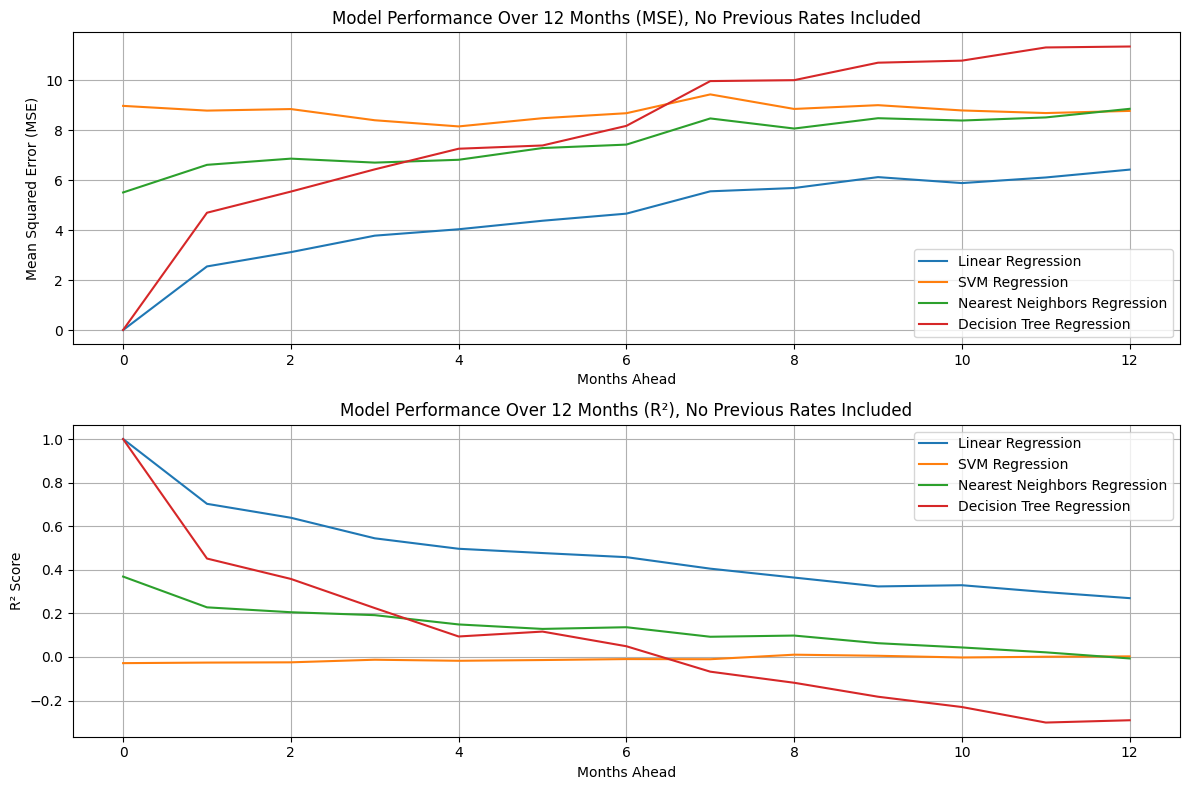

In [168]:
plt.figure(figsize=(12, 8))
months = list(range(0, 13))  # current to 12 months later

# Models to exclude from plots
excluded_models = ["Stochastic Gradient Regression"]

# Plot MSE for each model
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
for model_name, mse_values in mse_results_no_prev.items():
    if model_name not in excluded_models:
        plt.plot(months, mse_values, label=model_name)
plt.title("Model Performance Over 12 Months (MSE), No Previous Rates Included")
plt.xlabel("Months Ahead")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.grid()

# Plot R² for each model
plt.subplot(2, 1, 2)
for model_name, r2_values in r2_results_no_prev.items():
    if model_name not in excluded_models:
        plt.plot(months, r2_values, label=model_name)
plt.title("Model Performance Over 12 Months (R²), No Previous Rates Included")
plt.xlabel("Months Ahead")
plt.ylabel("R² Score")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


### Running models with 3 previous months

In [169]:
# List of target columns for each month (current and 1-12 months later)
target_columns = [
    "Rate", "Rate_1M_Later", "Rate_2M_Later", "Rate_3M_Later", "Rate_4M_Later",
    "Rate_5M_Later", "Rate_6M_Later", "Rate_7M_Later", "Rate_8M_Later", "Rate_9M_Later",
    "Rate_10M_Later", "Rate_11M_Later", "Rate_12M_Later"
]

# Features to be used for prediction
features = ["Fire_Size", "CPI", "Interest Rate", "NumWorkStoppages", "NumWorkersInStoppages", "WorkStoppagesTotalDays", "Rate", "Rate_1M_Previous", "Rate_2M_Previous", "Rate_3M_Previous"]

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "SVM Regression": SVR(),
    "Stochastic Gradient Regression": SGDRegressor(max_iter=1000, tol=1e-3, random_state=42),
    "Nearest Neighbors Regression": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree Regression": DecisionTreeRegressor(random_state=42)
}

mse_results_3_prev = {model_name: [] for model_name in models.keys()}
r2_results_3_prev = {model_name: [] for model_name in models.keys()}

# Loop over each target column and train models to predict that month's rate
for target_column in target_columns:
    print(f"Training models to predict {target_column}...")

    # Define the target variable (y) and the features (X)
    X = bin_5_data_cleaned[features]
    y = bin_5_data_cleaned[target_column]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train and evaluate models
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Store the results
        mse_results_3_prev[model_name].append(mse)
        r2_results_3_prev[model_name].append(r2)

        print(f"{model_name} - MSE for {target_column}: {mse}")
        print(f"{model_name} - R² for {target_column}: {r2}")

    print("\n" + "-"*50 + "\n")



Training models to predict Rate...
Linear Regression - MSE for Rate: 3.702544447270297e-26
Linear Regression - R² for Rate: 1.0
SVM Regression - MSE for Rate: 8.980365776225353
SVM Regression - R² for Rate: -0.02807840400949635
Stochastic Gradient Regression - MSE for Rate: 5.607476461064823e+33
Stochastic Gradient Regression - R² for Rate: -6.419477328946247e+32
Nearest Neighbors Regression - MSE for Rate: 4.978340021119325
Nearest Neighbors Regression - R² for Rate: 0.43007623619533464
Decision Tree Regression - MSE for Rate: 0.014294262583597334
Decision Tree Regression - R² for Rate: 0.9983635830622465

--------------------------------------------------

Training models to predict Rate_1M_Later...
Linear Regression - MSE for Rate_1M_Later: 2.3135697529822297
Linear Regression - R² for Rate_1M_Later: 0.7300867897022414
SVM Regression - MSE for Rate_1M_Later: 8.790757881085922
SVM Regression - R² for Rate_1M_Later: -0.025576029240406584
Stochastic Gradient Regression - MSE for Rate_1

<Figure size 1200x800 with 0 Axes>

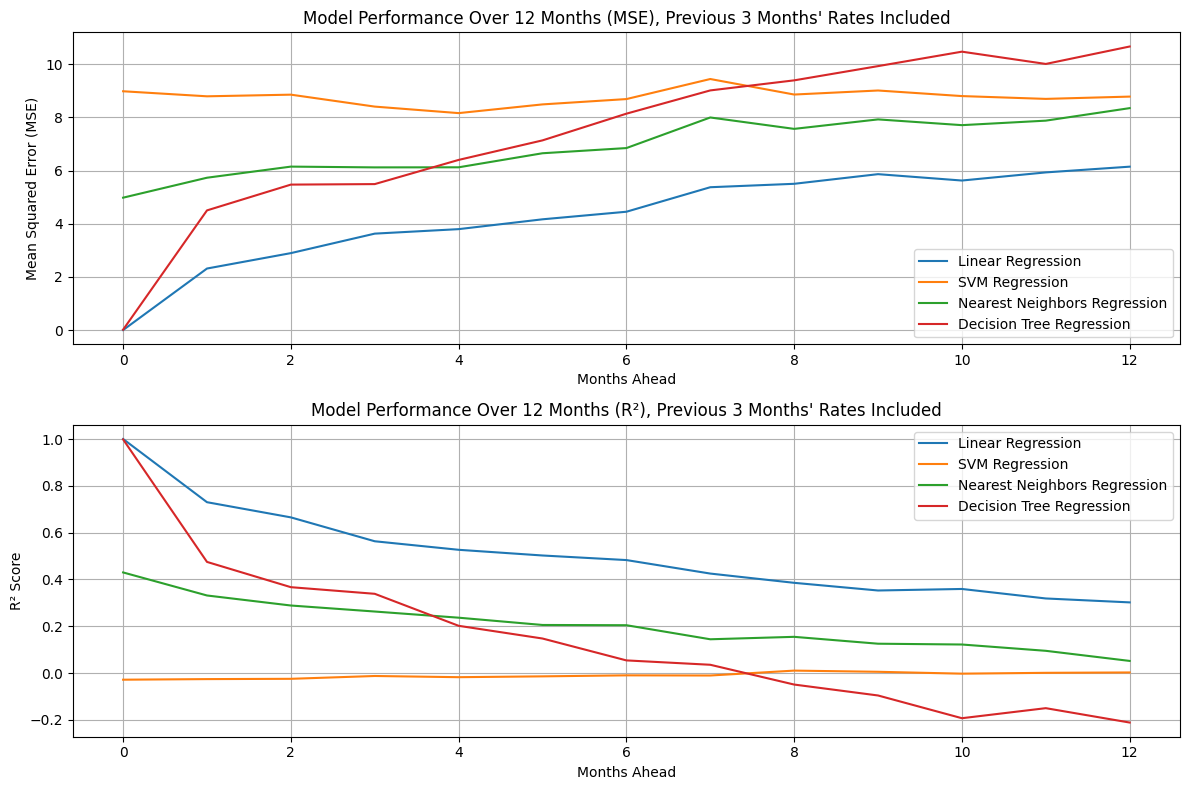

In [170]:
plt.figure(figsize=(12, 8))
months = list(range(0, 13))  # current to 12 months later

# Models to exclude from plots
excluded_models = ["Stochastic Gradient Regression"]

# Plot MSE for each model
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
for model_name, mse_values in mse_results_3_prev.items():
    if model_name not in excluded_models:
        plt.plot(months, mse_values, label=model_name)
plt.title("Model Performance Over 12 Months (MSE), Previous 3 Months' Rates Included")
plt.xlabel("Months Ahead")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.grid()

# Plot R² for each model
plt.subplot(2, 1, 2)
for model_name, r2_values in r2_results_3_prev.items():
    if model_name not in excluded_models:
        plt.plot(months, r2_values, label=model_name)
plt.title("Model Performance Over 12 Months (R²), Previous 3 Months' Rates Included")
plt.xlabel("Months Ahead")
plt.ylabel("R² Score")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Conclusion from above model with using previous (3-month) rates: Linear Regression model has higher R^2 value and lower MSE

In [171]:
mse_diff = []

for i in range(0, len(mse_results_3_prev["Linear Regression"])):
    diff = mse_results_3_prev["Linear Regression"][i] - mse_results_no_prev["Linear Regression"][i]
    mse_diff.append(diff)

print(mse_diff)


[3.5750585082214495e-26, -0.23543956527755228, -0.2289088506068815, -0.1559172489656837, -0.24330371048712207, -0.21476159164946207, -0.21482759401800777, -0.18755495162194524, -0.19119758452524493, -0.2649051383533694, -0.26549018788048695, -0.1847334651581498, -0.28402090128753166]


In [172]:
r2_diff = []

for i in range(0, len(r2_results_3_prev["Linear Regression"])):
    diff = r2_results_3_prev["Linear Regression"][i] - r2_results_no_prev["Linear Regression"][i]
    r2_diff.append(diff)

print(r2_diff)


[0.0, 0.027467617439784542, 0.026486551395151325, 0.018781496227987304, 0.030339609063834816, 0.025656546240043876, 0.024965951951573584, 0.0200687920860384, 0.021354693791509227, 0.02923718442103862, 0.030242202347447678, 0.021222438049542824, 0.0322577786863959]


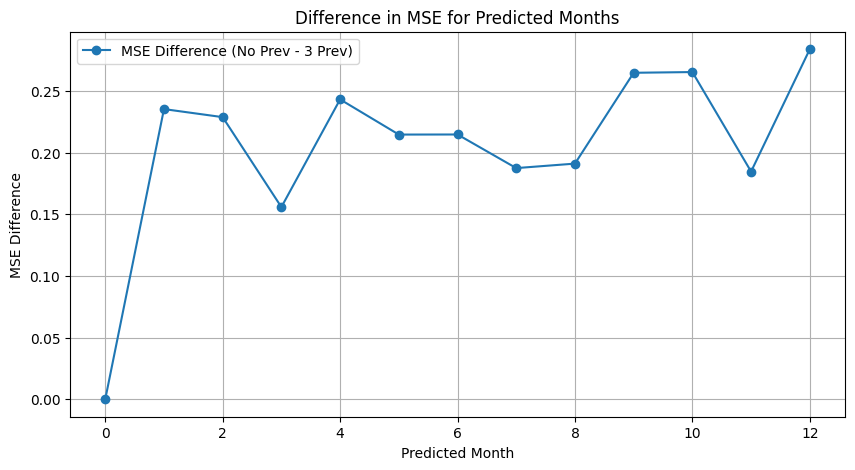

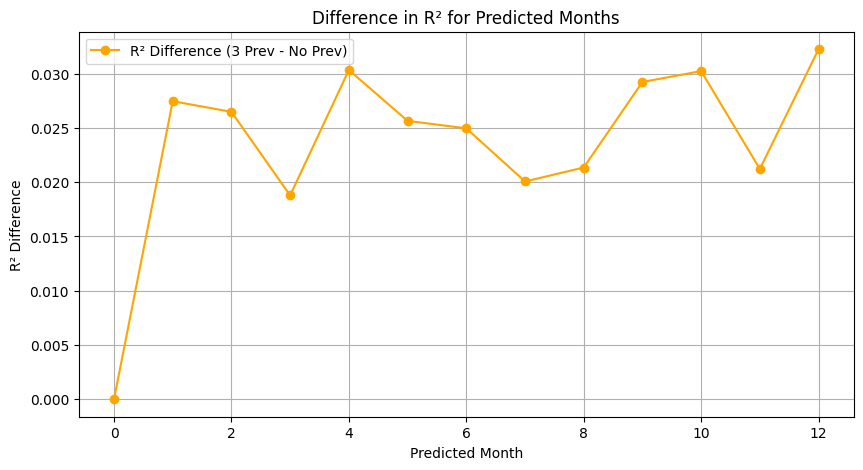

In [173]:
months = list(range(0, 13))  # current to 12 months later

# Calculate differences
mse_diff = []
r2_diff = []

for i in range(0, len(mse_results_3_prev["Linear Regression"])):
    diff = mse_results_no_prev["Linear Regression"][i] - mse_results_3_prev["Linear Regression"][i] # want MSE to go down
    mse_diff.append(diff)

for i in range(0, len(r2_results_3_prev["Linear Regression"])):
    diff = r2_results_3_prev["Linear Regression"][i] - r2_results_no_prev["Linear Regression"][i] # want r^2 to go up
    r2_diff.append(diff)

# plot MSE differences
plt.figure(figsize=(10, 5))
plt.plot(months, mse_diff, marker='o', label='MSE Difference (No Prev - 3 Prev)')
plt.title('Difference in MSE for Predicted Months')
plt.xlabel('Predicted Month')
plt.ylabel('MSE Difference')
plt.grid(True)
plt.legend()
plt.show()

# plot R² differences
plt.figure(figsize=(10, 5))
plt.plot(months, r2_diff, marker='o', label='R² Difference (3 Prev - No Prev)', color='orange')
plt.title('Difference in R² for Predicted Months')
plt.xlabel('Predicted Month')
plt.ylabel('R² Difference')
plt.grid(True)
plt.legend()
plt.show()


Run models without fire size as a feature

In [174]:
# List of target columns for each month (current and 1-12 months later)
target_columns = [
    "Rate", "Rate_1M_Later", "Rate_2M_Later", "Rate_3M_Later", "Rate_4M_Later",
    "Rate_5M_Later", "Rate_6M_Later", "Rate_7M_Later", "Rate_8M_Later", "Rate_9M_Later",
    "Rate_10M_Later", "Rate_11M_Later", "Rate_12M_Later"
]

# Features to be used for prediction (not including fire size)
features = ["CPI", "Interest Rate", "NumWorkStoppages", "NumWorkersInStoppages", "WorkStoppagesTotalDays", "Rate", "Rate_1M_Previous", "Rate_2M_Previous", "Rate_3M_Previous"]

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "SVM Regression": SVR(),
    "Stochastic Gradient Regression": SGDRegressor(max_iter=1000, tol=1e-3, random_state=42),
    "Nearest Neighbors Regression": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree Regression": DecisionTreeRegressor(random_state=42)
}

# Loop over each target column and train models to predict that month's rate
for target_column in target_columns:
    print(f"Training models to predict {target_column}...")

    # Define the target variable (y) and the features (X)
    X = bin_5_data_cleaned[features]
    y = bin_5_data_cleaned[target_column]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train and evaluate models
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        print(f"{model_name} - MSE for {target_column}: {mse}")

        r2 = r2_score(y_test, y_pred)
        print(f"{model_name} - R^2 for {target_column}: {r2}")

    print("\n" + "-"*50 + "\n")


Training models to predict Rate...
Linear Regression - MSE for Rate: 2.066386744836214e-28
Linear Regression - R^2 for Rate: 1.0
SVM Regression - MSE for Rate: 8.435696813775026
SVM Regression - R^2 for Rate: 0.03427567059979031
Stochastic Gradient Regression - MSE for Rate: 6.12317313944956e+31
Stochastic Gradient Regression - R^2 for Rate: -7.009850406477645e+30
Nearest Neighbors Regression - MSE for Rate: 0.5023021471312918
Nearest Neighbors Regression - R^2 for Rate: 0.9424961073277865
Decision Tree Regression - MSE for Rate: 0.0007286166842661033
Decision Tree Regression - R^2 for Rate: 0.9999165874646355

--------------------------------------------------

Training models to predict Rate_1M_Later...
Linear Regression - MSE for Rate_1M_Later: 2.31502691553417
Linear Regression - R^2 for Rate_1M_Later: 0.729916789458327
SVM Regression - MSE for Rate_1M_Later: 8.326482835427585
SVM Regression - R^2 for Rate_1M_Later: 0.028588738376065126
Stochastic Gradient Regression - MSE for Rate


*  Can be seen that linear regression and nearest neighbors consistently have the lowest error for the majority of the models and iterations.
*   Linear regression performed similarly when including and not including rate
*   Nearest neighbors performed (significantly) worse when not including rate

*  Random variable --> harder to predict

### Attempts to improve linear regression model (including fire size as a feature)

## 5-fold k-means

In [205]:
# List of target columns for each month (current and 1-12 months later)
target_columns = [
    "Rate", "Rate_1M_Later", "Rate_2M_Later", "Rate_3M_Later", "Rate_4M_Later",
    "Rate_5M_Later", "Rate_6M_Later", "Rate_7M_Later", "Rate_8M_Later", "Rate_9M_Later",
    "Rate_10M_Later", "Rate_11M_Later", "Rate_12M_Later"
]

# Features to be used for prediction
features = ["Fire_Size", "CPI", "Interest Rate", "NumWorkStoppages", "NumWorkersInStoppages", "WorkStoppagesTotalDays", "Rate", "Rate_1M_Previous", "Rate_2M_Previous", "Rate_3M_Previous"]

avg_mse_scores_5_fold = []
avg_r2_scores_5_fold = []


# Loop over each target column and train models to predict that month's rate
for target_column in target_columns:
    print(f"Training models to predict {target_column}...")

    # Define the target variable (y) and the features (X)
    X = bin_5_data_cleaned[features]
    y = bin_5_data_cleaned[target_column]

    # Initialize k-fold cross-validation
    k = 5  # Number of folds
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Initialize Linear Regression model
    model = LinearRegression()

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # List to store mean squared errors for each fold
    mse_scores = []
    r_squared_scores = []

    # Perform k-fold cross-validation
    for train_index, test_index in kf.split(X):
        # Split data into training and testing sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate and store Mean Squared Error for the fold
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)

        # Calculate and store R^2 for the fold
        r_squared = r2_score(y_test, y_pred)
        r_squared_scores.append(r_squared)

    # Print the Mean Squared Error for each fold and the average
    for i, mse in enumerate(mse_scores, 1):
        print(f"Fold {i} - MSE: {mse:.4f}")


    print(f"\nAverage MSE: {np.mean(mse_scores):.4f}")
    avg_mse_scores_5_fold.append(np.mean(mse_scores))

    print("")

    for i, r2 in enumerate(r_squared_scores, 1):
        print(f"Fold {i} - R^2: {r2:.4f}")

    print(f"\nAverage r^2: {np.mean(r_squared_scores):.4f}")
    avg_r2_scores_5_fold.append(np.mean(r_squared_scores))


    print("\n" + "-"*50 + "\n")



Training models to predict Rate...
Fold 1 - MSE: 0.0000
Fold 2 - MSE: 0.0000
Fold 3 - MSE: 0.0000
Fold 4 - MSE: 0.0000
Fold 5 - MSE: 0.0000

Average MSE: 0.0000

Fold 1 - R^2: 1.0000
Fold 2 - R^2: 1.0000
Fold 3 - R^2: 1.0000
Fold 4 - R^2: 1.0000
Fold 5 - R^2: 1.0000

Average r^2: 1.0000

--------------------------------------------------

Training models to predict Rate_1M_Later...
Fold 1 - MSE: 1.0727
Fold 2 - MSE: 1.1466
Fold 3 - MSE: 1.1705
Fold 4 - MSE: 1.1574
Fold 5 - MSE: 0.9917

Average MSE: 1.1078

Fold 1 - R^2: 0.9284
Fold 2 - R^2: 0.9285
Fold 3 - R^2: 0.9267
Fold 4 - R^2: 0.9236
Fold 5 - R^2: 0.9349

Average r^2: 0.9284

--------------------------------------------------

Training models to predict Rate_2M_Later...
Fold 1 - MSE: 1.5474
Fold 2 - MSE: 1.5251
Fold 3 - MSE: 1.5787
Fold 4 - MSE: 1.4534
Fold 5 - MSE: 1.4477

Average MSE: 1.5105

Fold 1 - R^2: 0.8992
Fold 2 - R^2: 0.9033
Fold 3 - R^2: 0.8997
Fold 4 - R^2: 0.9028
Fold 5 - R^2: 0.9046

Average r^2: 0.9019

-----------

In [206]:
avg_mse_scores_5_fold

[7.544528855343112e-26,
 1.1077892153989441,
 1.510461539269349,
 1.846425103278514,
 2.08024555734682,
 2.3423163236649693,
 2.5914419675613507,
 2.8359611610222064,
 2.99815513729865,
 3.1675046994853586,
 3.256579217662808,
 3.3431198827211346,
 3.4038767782074286]

In [207]:
avg_r2_scores_5_fold

[1.0,
 0.9283786477010496,
 0.9019119350903312,
 0.8799697411382619,
 0.8654384371645927,
 0.8507065229470262,
 0.8377078737767392,
 0.8263563010099728,
 0.8198331486751191,
 0.8128027254414324,
 0.8096191822997205,
 0.8055550922816913,
 0.8013799413516403]

### Plotting average MSE for each month prediction

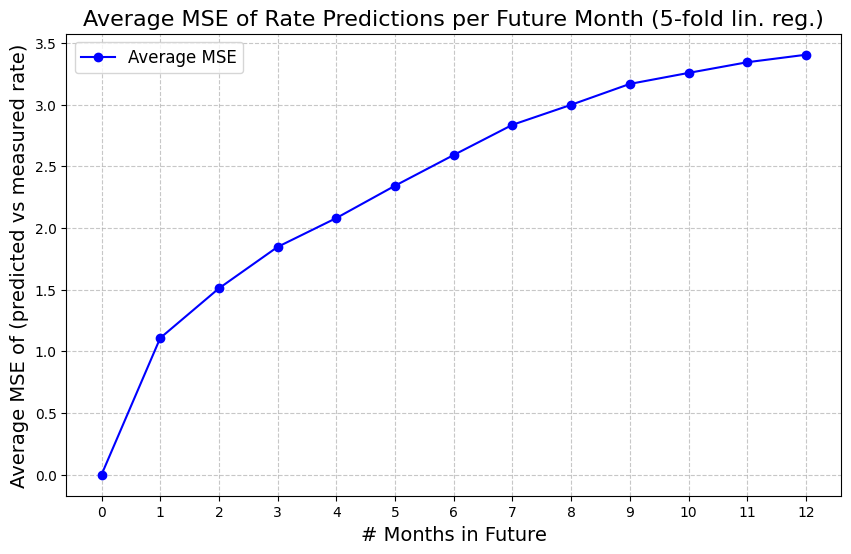

In [208]:
months = list(range(13))

plt.figure(figsize=(10, 6))
plt.plot(months, avg_mse_scores_5_fold, marker='o', linestyle='-', color='b', label='Average MSE')
plt.title('Average MSE of Rate Predictions per Future Month (5-fold lin. reg.)', fontsize=16)
plt.xlabel('# Months in Future', fontsize=14)
plt.ylabel('Average MSE of (predicted vs measured rate)', fontsize=14)
plt.xticks(months)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()

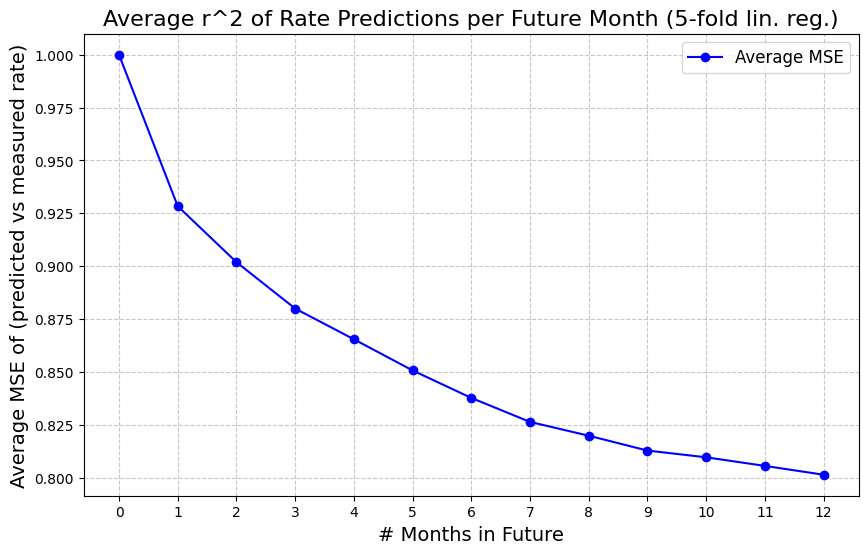

In [209]:
months = list(range(13))

plt.figure(figsize=(10, 6))
plt.plot(months, avg_r2_scores_5_fold, marker='o', linestyle='-', color='b', label='Average MSE')
plt.title('Average r^2 of Rate Predictions per Future Month (5-fold lin. reg.)', fontsize=16)
plt.xlabel('# Months in Future', fontsize=14)
plt.ylabel('Average MSE of (predicted vs measured rate)', fontsize=14)
plt.xticks(months)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()

## 10-fold k-means

In [210]:
# List of target columns for each month (current and 1-12 months later)
target_columns = [
    "Rate", "Rate_1M_Later", "Rate_2M_Later", "Rate_3M_Later", "Rate_4M_Later",
    "Rate_5M_Later", "Rate_6M_Later", "Rate_7M_Later", "Rate_8M_Later", "Rate_9M_Later",
    "Rate_10M_Later", "Rate_11M_Later", "Rate_12M_Later"
]

# Features to be used for prediction
features = ["Fire_Size", "CPI", "Interest Rate", "NumWorkStoppages", "NumWorkersInStoppages", "WorkStoppagesTotalDays", "Rate", "Rate_1M_Previous", "Rate_2M_Previous", "Rate_3M_Previous"]

avg_mse_scores_10_fold = []
avg_r2_scores_10_fold = []


# Loop over each target column and train models to predict that month's rate
for target_column in target_columns:
    print(f"Training models to predict {target_column}...")

    # Define the target variable (y) and the features (X)
    X = bin_5_data_cleaned[features]
    y = bin_5_data_cleaned[target_column]

    # Initialize k-fold cross-validation
    k = 10  # Number of folds
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Initialize Linear Regression model
    model = LinearRegression()

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # List to store mean squared errors for each fold
    mse_scores = []
    r_squared_scores = []

    # Perform k-fold cross-validation
    for train_index, test_index in kf.split(X):
        # Split data into training and testing sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate and store Mean Squared Error for the fold
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)

        # Calculate and store R^2 for the fold
        r_squared = r2_score(y_test, y_pred)
        r_squared_scores.append(r_squared)

    # Print the Mean Squared Error for each fold and the average
    for i, mse in enumerate(mse_scores, 1):
        print(f"Fold {i} - MSE: {mse:.4f}")

    print(f"\nAverage MSE: {np.mean(mse_scores):.4f}")
    avg_mse_scores_10_fold.append(np.mean(mse_scores))

    print("")

    # Print the r^2 for each fold and the average
    for i, r2 in enumerate(r_squared_scores, 1):
        print(f"Fold {i} - r^2: {r2:.4f}")

    print(f"\nAverage r^2: {np.mean(r_squared_scores):.4f}")
    avg_r2_scores_10_fold.append(np.mean(r_squared_scores))

    print("\n" + "-"*50 + "\n")



Training models to predict Rate...
Fold 1 - MSE: 0.0000
Fold 2 - MSE: 0.0000
Fold 3 - MSE: 0.0000
Fold 4 - MSE: 0.0000
Fold 5 - MSE: 0.0000
Fold 6 - MSE: 0.0000
Fold 7 - MSE: 0.0000
Fold 8 - MSE: 0.0000
Fold 9 - MSE: 0.0000
Fold 10 - MSE: 0.0000

Average MSE: 0.0000

Fold 1 - r^2: 1.0000
Fold 2 - r^2: 1.0000
Fold 3 - r^2: 1.0000
Fold 4 - r^2: 1.0000
Fold 5 - r^2: 1.0000
Fold 6 - r^2: 1.0000
Fold 7 - r^2: 1.0000
Fold 8 - r^2: 1.0000
Fold 9 - r^2: 1.0000
Fold 10 - r^2: 1.0000

Average r^2: 1.0000

--------------------------------------------------

Training models to predict Rate_1M_Later...
Fold 1 - MSE: 1.0493
Fold 2 - MSE: 1.0991
Fold 3 - MSE: 1.1621
Fold 4 - MSE: 1.1293
Fold 5 - MSE: 1.2155
Fold 6 - MSE: 1.1218
Fold 7 - MSE: 1.1824
Fold 8 - MSE: 1.1318
Fold 9 - MSE: 1.0401
Fold 10 - MSE: 0.9513

Average MSE: 1.1083

Fold 1 - r^2: 0.9300
Fold 2 - r^2: 0.9265
Fold 3 - r^2: 0.9248
Fold 4 - r^2: 0.9320
Fold 5 - r^2: 0.9249
Fold 6 - r^2: 0.9287
Fold 7 - r^2: 0.9221
Fold 8 - r^2: 0.9251
Fo

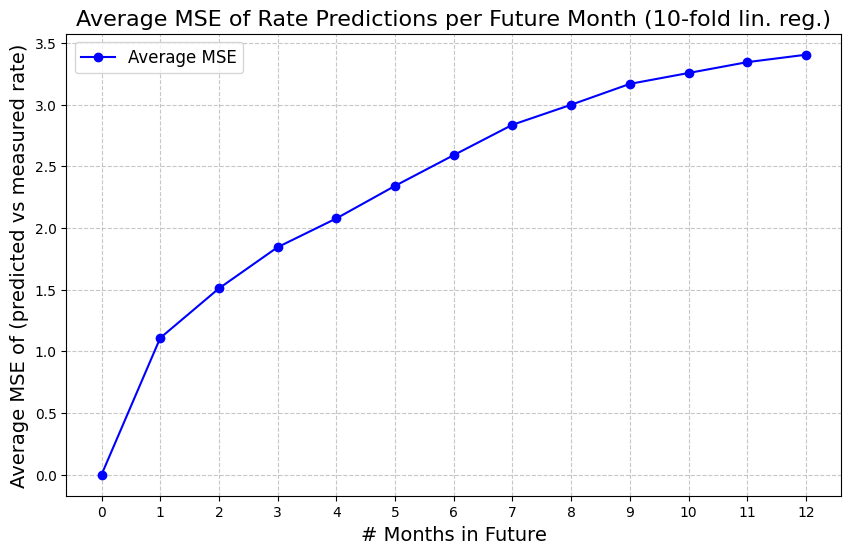

In [211]:
months = list(range(13))

plt.figure(figsize=(10, 6))
plt.plot(months, avg_mse_scores_10_fold, marker='o', linestyle='-', color='b', label='Average MSE')
plt.title('Average MSE of Rate Predictions per Future Month (10-fold lin. reg.)', fontsize=16)
plt.xlabel('# Months in Future', fontsize=14)
plt.ylabel('Average MSE of (predicted vs measured rate)', fontsize=14)
plt.xticks(months)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()

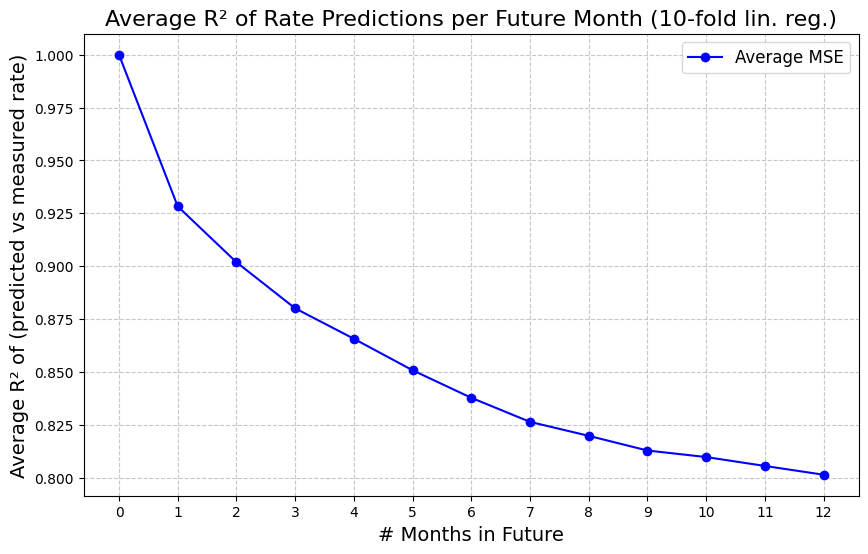

In [212]:
months = list(range(13))

plt.figure(figsize=(10, 6))
plt.plot(months, avg_r2_scores_10_fold, marker='o', linestyle='-', color='b', label='Average MSE')
plt.title('Average R² of Rate Predictions per Future Month (10-fold lin. reg.)', fontsize=16)
plt.xlabel('# Months in Future', fontsize=14)
plt.ylabel('Average R² of (predicted vs measured rate)', fontsize=14)
plt.xticks(months)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()

## 100-fold linear regression

In [213]:
# List of target columns for each month (current and 1-12 months later)
target_columns = [
    "Rate", "Rate_1M_Later", "Rate_2M_Later", "Rate_3M_Later", "Rate_4M_Later",
    "Rate_5M_Later", "Rate_6M_Later", "Rate_7M_Later", "Rate_8M_Later", "Rate_9M_Later",
    "Rate_10M_Later", "Rate_11M_Later", "Rate_12M_Later"
]

# Features to be used for prediction
features = ["Fire_Size", "CPI", "Interest Rate", "NumWorkStoppages", "NumWorkersInStoppages", "WorkStoppagesTotalDays", "Rate", "Rate_1M_Previous", "Rate_2M_Previous", "Rate_3M_Previous"]

avg_mse_scores_100_fold = []
avg_r2_scores_100_fold = []


# Loop over each target column and train models to predict that month's rate
for target_column in target_columns:
    print(f"Training models to predict {target_column}...")

    # Define the target variable (y) and the features (X)
    X = bin_5_data_cleaned[features]
    y = bin_5_data_cleaned[target_column]

    # Initialize k-fold cross-validation
    k = 100  # Number of folds
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Initialize Linear Regression model
    model = LinearRegression()

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # List to store mean squared errors for each fold
    mse_scores = []
    r_squared_scores = []

    # Perform k-fold cross-validation
    for train_index, test_index in kf.split(X):
        # Split data into training and testing sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate and store Mean Squared Error for the fold
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)

        # Calculate and store r^2 for the fold
        r_squared = r2_score(y_test, y_pred)
        r_squared_scores.append(r_squared)

    # # Print the Mean Squared Error for each fold and the average

    print(f"\nAverage MSE: {np.mean(mse_scores):.4f}")
    avg_mse_scores_100_fold.append(np.mean(mse_scores))

    print(f"\nAverage r^2: {np.mean(r_squared_scores):.4f}")
    avg_r2_scores_100_fold.append(np.mean(r_squared_scores))

    print("\n" + "-"*50 + "\n")



Training models to predict Rate...

Average MSE: 0.0000

Average r^2: 1.0000

--------------------------------------------------

Training models to predict Rate_1M_Later...

Average MSE: 1.1083

Average r^2: 0.9285

--------------------------------------------------

Training models to predict Rate_2M_Later...

Average MSE: 1.5105

Average r^2: 0.9025

--------------------------------------------------

Training models to predict Rate_3M_Later...

Average MSE: 1.8442

Average r^2: 0.8805

--------------------------------------------------

Training models to predict Rate_4M_Later...

Average MSE: 2.0776

Average r^2: 0.8665

--------------------------------------------------

Training models to predict Rate_5M_Later...

Average MSE: 2.3419

Average r^2: 0.8513

--------------------------------------------------

Training models to predict Rate_6M_Later...

Average MSE: 2.5912

Average r^2: 0.8383

--------------------------------------------------

Training models to predict Rate_7M_L

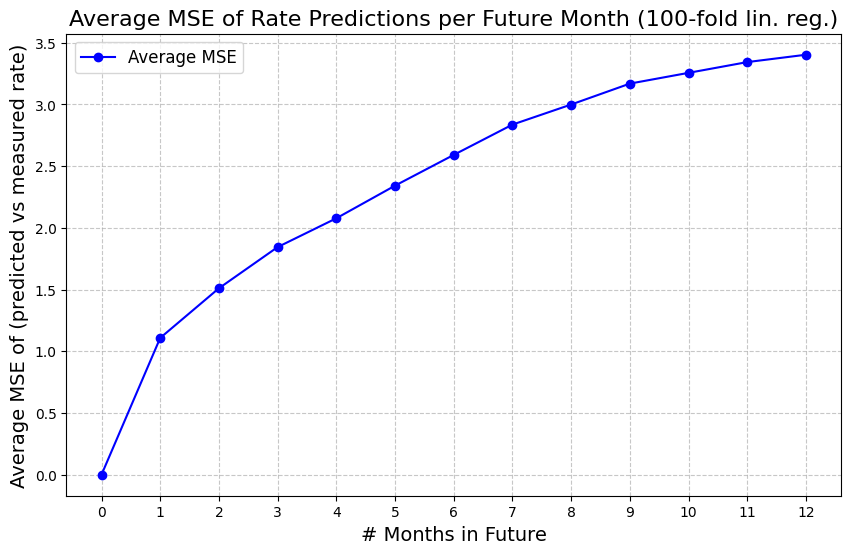

In [214]:
months = list(range(13))

plt.figure(figsize=(10, 6))
plt.plot(months, avg_mse_scores_100_fold, marker='o', linestyle='-', color='b', label='Average MSE')
plt.title('Average MSE of Rate Predictions per Future Month (100-fold lin. reg.)', fontsize=16)
plt.xlabel('# Months in Future', fontsize=14)
plt.ylabel('Average MSE of (predicted vs measured rate)', fontsize=14)
plt.xticks(months)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()

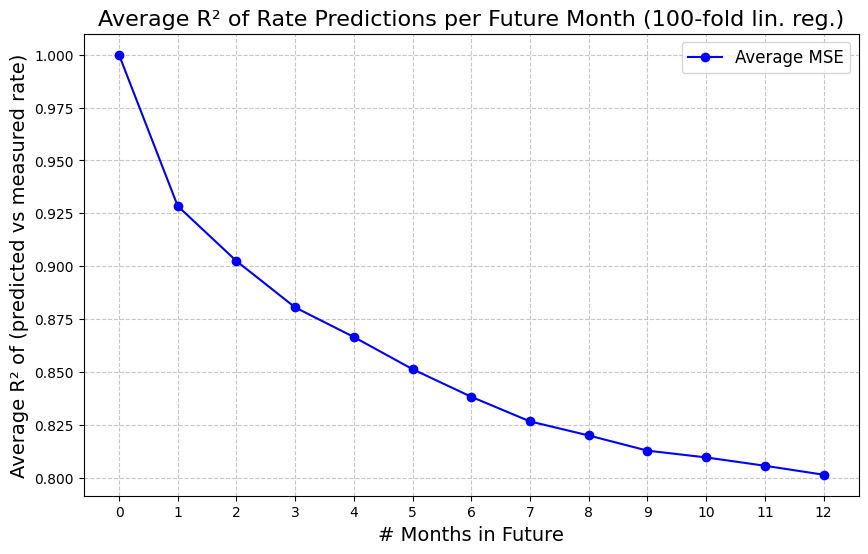

In [215]:
months = list(range(13))

plt.figure(figsize=(10, 6))
plt.plot(months, avg_r2_scores_100_fold, marker='o', linestyle='-', color='b', label='Average MSE')
plt.title('Average R² of Rate Predictions per Future Month (100-fold lin. reg.)', fontsize=16)
plt.xlabel('# Months in Future', fontsize=14)
plt.ylabel('Average R² of (predicted vs measured rate)', fontsize=14)
plt.xticks(months)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()

In [216]:
avg_mse_scores_5_fold

[7.544528855343112e-26,
 1.1077892153989441,
 1.510461539269349,
 1.846425103278514,
 2.08024555734682,
 2.3423163236649693,
 2.5914419675613507,
 2.8359611610222064,
 2.99815513729865,
 3.1675046994853586,
 3.256579217662808,
 3.3431198827211346,
 3.4038767782074286]

In [217]:
avg_mse_scores_10_fold

[7.505901377121006e-26,
 1.1082660171180891,
 1.5100476069803417,
 1.8442833428509526,
 2.0773029429017136,
 2.341317584740188,
 2.5906075176527272,
 2.8365023524983233,
 2.998887158918827,
 3.167924505925951,
 3.2561642433985987,
 3.3441682819339484,
 3.4041848284429816]

In [218]:
avg_mse_scores_100_fold

[7.476267960751196e-26,
 1.108290240117841,
 1.510539583020409,
 1.8442304258762354,
 2.077578536013783,
 2.341949339243573,
 2.5912356490030852,
 2.8365805769166443,
 2.9993004237075285,
 3.1687145827154306,
 3.2558892727908826,
 3.343011482036138,
 3.4025852638734477]

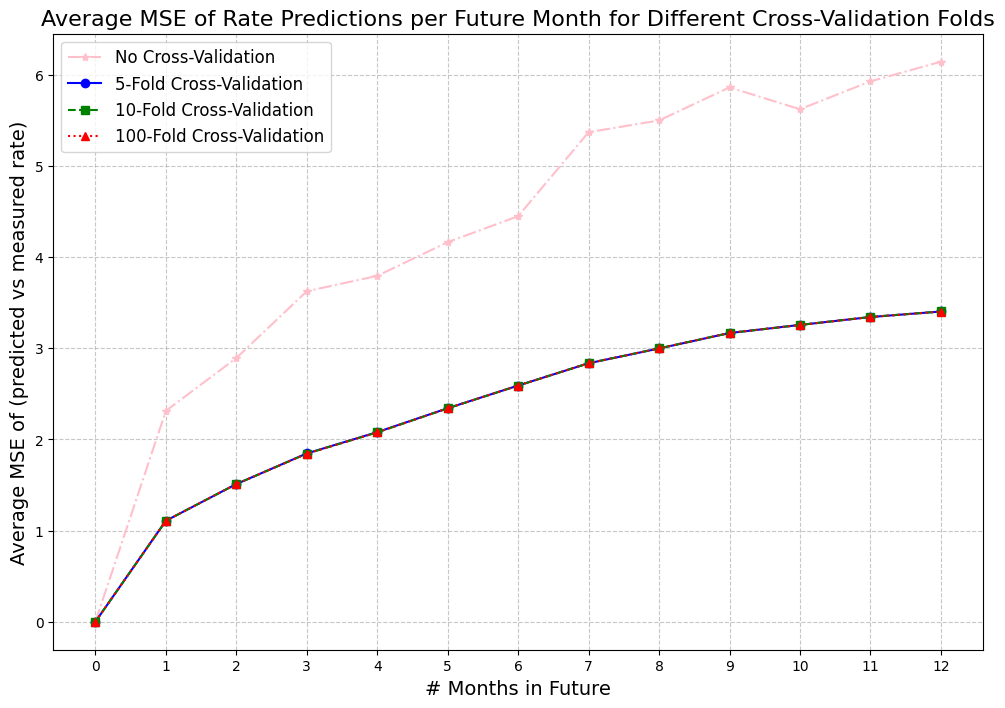

In [219]:
plt.figure(figsize=(12, 8))
plt.plot(months, mse_results_3_prev["Linear Regression"], marker='*', linestyle='dashdot', color='pink', label='No Cross-Validation')
plt.plot(months, avg_mse_scores_5_fold, marker='o', linestyle='-', color='b', label='5-Fold Cross-Validation')
plt.plot(months, avg_mse_scores_10_fold, marker='s', linestyle='--', color='g', label='10-Fold Cross-Validation')
plt.plot(months, avg_mse_scores_100_fold, marker='^', linestyle=':', color='r', label='100-Fold Cross-Validation')

plt.title('Average MSE of Rate Predictions per Future Month for Different Cross-Validation Folds', fontsize=16)
plt.xlabel('# Months in Future', fontsize=14)
plt.ylabel('Average MSE of (predicted vs measured rate)', fontsize=14)
plt.xticks(months)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()


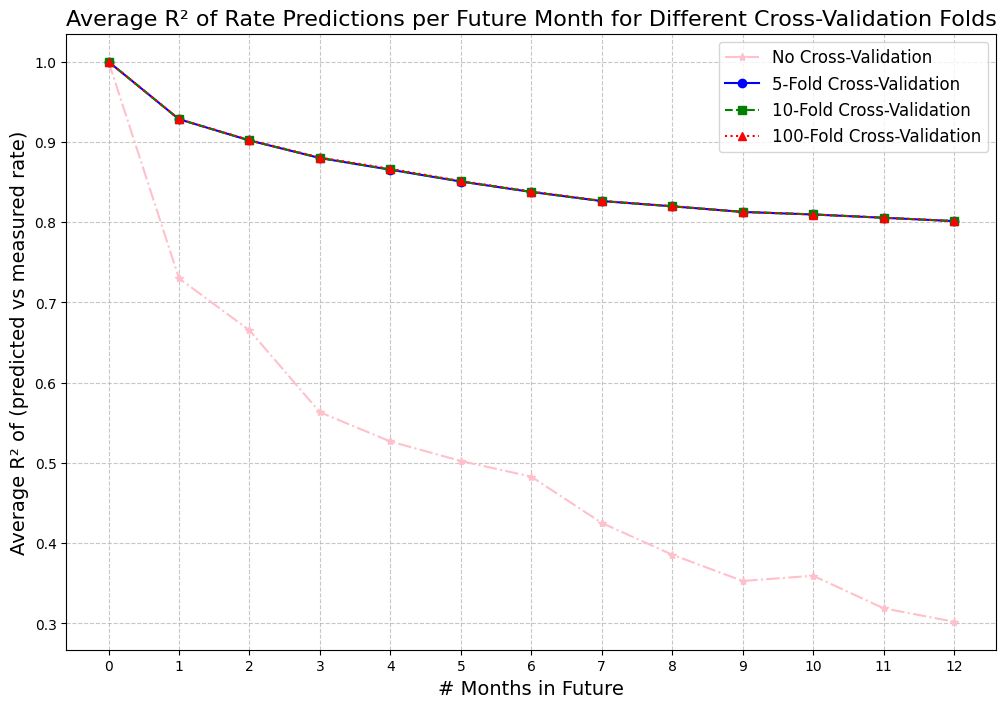

In [220]:
plt.figure(figsize=(12, 8))
plt.plot(months, r2_results_3_prev["Linear Regression"], marker='*', linestyle='dashdot', color='pink', label='No Cross-Validation')
plt.plot(months, avg_r2_scores_5_fold, marker='o', linestyle='-', color='b', label='5-Fold Cross-Validation')
plt.plot(months, avg_r2_scores_10_fold, marker='s', linestyle='--', color='g', label='10-Fold Cross-Validation')
plt.plot(months, avg_r2_scores_100_fold, marker='^', linestyle=':', color='r', label='100-Fold Cross-Validation')

plt.title('Average R² of Rate Predictions per Future Month for Different Cross-Validation Folds', fontsize=16)
plt.xlabel('# Months in Future', fontsize=14)
plt.ylabel('Average R² of (predicted vs measured rate)', fontsize=14)
plt.xticks(months)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()


Running a linear model after feature engineering the following features:
* Fire_Size_Rate: captures interaction between Fire_Size and Rate to model multiplicative effects by multiplying fire size by rate
* CPI_InterestRate: interaction between CPI and Interest Rate for potential economic insights by multiplying CPI by interest rate
* Unemployment_MoM_Change: month-over-month change in Rate to capture temporal dynamics

In [221]:
# Add new features to the dataset
bin_5_data_cleaned["Fire_Size_Rate"] = bin_5_data_cleaned["Fire_Size"] * bin_5_data_cleaned["Rate"] # Captures interaction between Fire_Size and Rate to model multiplicative effects
bin_5_data_cleaned["CPI_InterestRate"] = bin_5_data_cleaned["CPI"] * bin_5_data_cleaned["Interest Rate"] # Interaction between CPI and Interest Rate for potential economic insights
bin_5_data_cleaned["Unemployment_MoM_Change"] = bin_5_data_cleaned["Rate"] - bin_5_data_cleaned["Rate"].shift(1) # Month-over-month change in Rate to capture temporal dynamics

# One-hot encode a categorical column, for example, "State" (replace with actual column name if present)
if "State" in bin_5_data_cleaned.columns:
    encoder = OneHotEncoder(sparse_output=False, drop="first")  # Use sparse_output instead of sparse
    state_encoded = pd.DataFrame(
        encoder.fit_transform(bin_5_data_cleaned[["State"]]),
        columns=encoder.get_feature_names_out(["State"])
    )
    bin_5_data_cleaned = pd.concat([bin_5_data_cleaned, state_encoded], axis=1)
    bin_5_data_cleaned.drop(columns=["State"], inplace=True)  # Drop original column after encoding


# Replace NaN values introduced by new features
bin_5_data_cleaned.fillna(0, inplace=True)

# Updated list of features to include derived features
features = [
    "Fire_Size", "CPI", "Interest Rate", "NumWorkStoppages", "NumWorkersInStoppages", "WorkStoppagesTotalDays", "Rate",
    "Fire_Size_Rate", "CPI_InterestRate", "Unemployment_MoM_Change", "Rate_1M_Previous", "Rate_2M_Previous", "Rate_3M_Previous"
]
if "State" in locals():
    features.extend(state_encoded.columns)  # Add encoded categorical features if applicable

# List of target columns for each month (current and 1-12 months later)
target_columns = [
    "Rate", "Rate_1M_Later", "Rate_2M_Later", "Rate_3M_Later", "Rate_4M_Later",
    "Rate_5M_Later", "Rate_6M_Later", "Rate_7M_Later", "Rate_8M_Later", "Rate_9M_Later",
    "Rate_10M_Later", "Rate_11M_Later", "Rate_12M_Later"
]

avg_mse_scores = []
avg_r2_scores = []

# Loop over each target column and train models to predict that month's rate
for target_column in target_columns:
    print(f"Training models to predict {target_column}...")

    # Define the target variable (y) and the features (X)
    X = bin_5_data_cleaned[features]
    y = bin_5_data_cleaned[target_column]

    # Initialize k-fold cross-validation
    k = 5  # Number of folds
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Initialize Linear Regression model
    model = LinearRegression()

    # List to store mean squared errors and r2 for each fold
    mse_scores = []
    r2_scores = []

    # Perform k-fold cross-validation
    for train_index, test_index in kf.split(X):
        # Split data into training and testing sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate and store Mean Squared Error for the fold
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)

        # Calculate and store r^2 for the fold
        r_squared = r2_score(y_test, y_pred)
        r2_scores.append(r_squared)

    # Print the Mean Squared Error and R^2 for each fold and the average
    for i, mse in enumerate(mse_scores, 1):
        print(f"Fold {i} - MSE: {mse:.4f}")

    print("\n")

    for i, mse in enumerate(r2_scores, 1):
        print(f"Fold {i} - R^2: {mse:.4f}")

    print(f"\nAverage MSE: {np.mean(mse_scores):.4f}")
    avg_mse_scores.append(np.mean(mse_scores))

    print(f"\nAverage r^2: {np.mean(r_squared_scores):.4f}")
    avg_r2_scores.append(np.mean(r2_scores))

    print("\n" + "-"*50 + "\n")


Training models to predict Rate...
Fold 1 - MSE: 0.0000
Fold 2 - MSE: 0.0000
Fold 3 - MSE: 0.0000
Fold 4 - MSE: 0.0000
Fold 5 - MSE: 0.0000


Fold 1 - R^2: 1.0000
Fold 2 - R^2: 1.0000
Fold 3 - R^2: 1.0000
Fold 4 - R^2: 1.0000
Fold 5 - R^2: 1.0000

Average MSE: 0.0000

Average r^2: 0.8014

--------------------------------------------------

Training models to predict Rate_1M_Later...
Fold 1 - MSE: 1.0729
Fold 2 - MSE: 1.1446
Fold 3 - MSE: 1.1705
Fold 4 - MSE: 1.1550
Fold 5 - MSE: 0.9917


Fold 1 - R^2: 0.9284
Fold 2 - R^2: 0.9286
Fold 3 - R^2: 0.9267
Fold 4 - R^2: 0.9237
Fold 5 - R^2: 0.9349

Average MSE: 1.1069

Average r^2: 0.8014

--------------------------------------------------

Training models to predict Rate_2M_Later...
Fold 1 - MSE: 1.5464
Fold 2 - MSE: 1.5249
Fold 3 - MSE: 1.5782
Fold 4 - MSE: 1.4531
Fold 5 - MSE: 1.4480


Fold 1 - R^2: 0.8992
Fold 2 - R^2: 0.9033
Fold 3 - R^2: 0.8998
Fold 4 - R^2: 0.9028
Fold 5 - R^2: 0.9046

Average MSE: 1.5101

Average r^2: 0.8014

--------

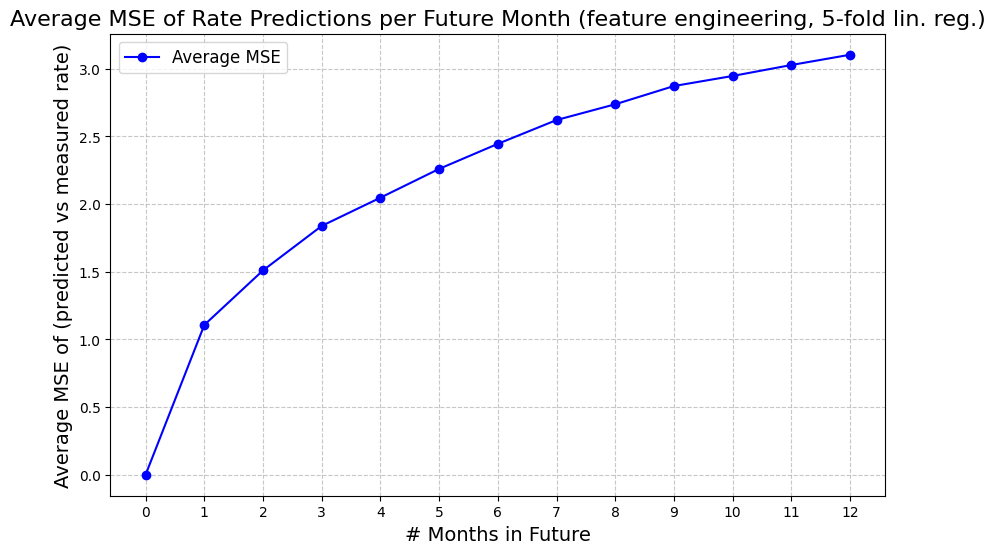

In [222]:
months = list(range(13))

plt.figure(figsize=(10, 6))
plt.plot(months, avg_mse_scores, marker='o', linestyle='-', color='b', label='Average MSE')
plt.title('Average MSE of Rate Predictions per Future Month (feature engineering, 5-fold lin. reg.)', fontsize=16)
plt.xlabel('# Months in Future', fontsize=14)
plt.ylabel('Average MSE of (predicted vs measured rate)', fontsize=14)
plt.xticks(months)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()

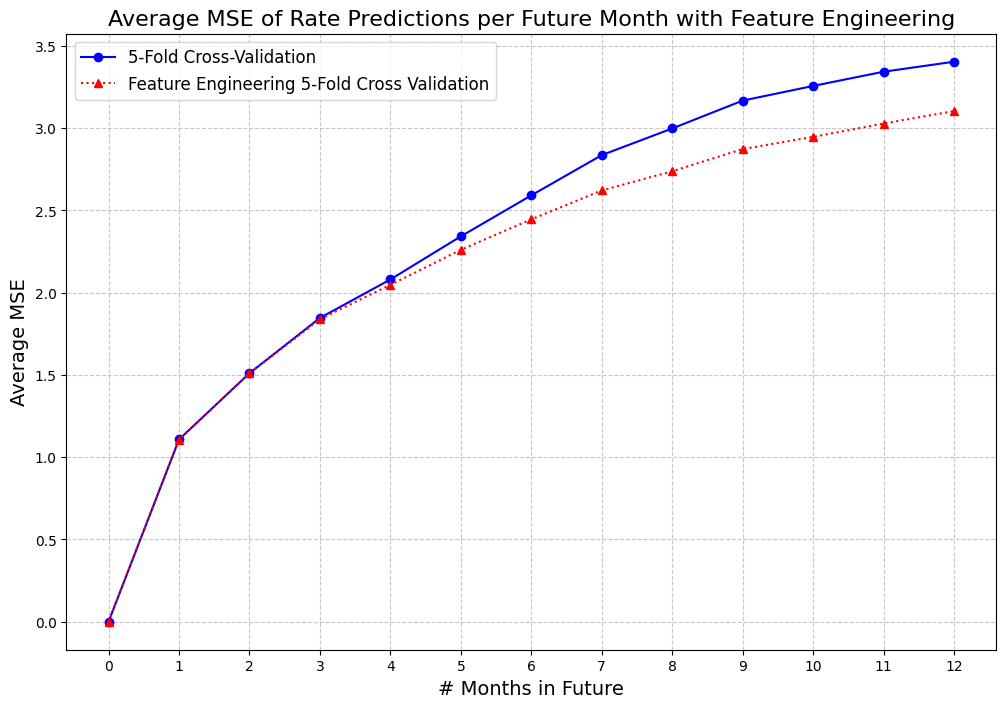

In [223]:
plt.figure(figsize=(12, 8))
plt.plot(months, avg_mse_scores_5_fold, marker='o', linestyle='-', color='b', label='5-Fold Cross-Validation')
plt.plot(months, avg_mse_scores, marker='^', linestyle=':', color='r', label='Feature Engineering 5-Fold Cross Validation')

plt.title('Average MSE of Rate Predictions per Future Month with Feature Engineering', fontsize=16)
plt.xlabel('# Months in Future', fontsize=14)
plt.ylabel('Average MSE', fontsize=14)
plt.xticks(months)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()


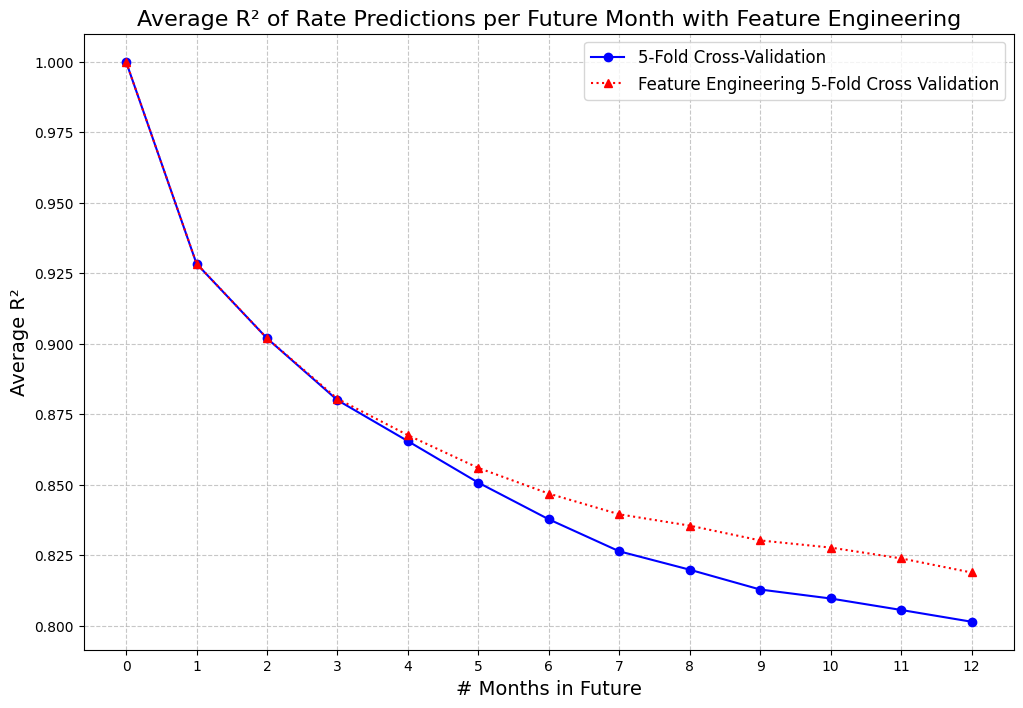

In [224]:
plt.figure(figsize=(12, 8))
plt.plot(months, avg_r2_scores_5_fold, marker='o', linestyle='-', color='b', label='5-Fold Cross-Validation')
plt.plot(months, avg_r2_scores, marker='^', linestyle=':', color='r', label='Feature Engineering 5-Fold Cross Validation')

plt.title('Average R² of Rate Predictions per Future Month with Feature Engineering', fontsize=16)
plt.xlabel('# Months in Future', fontsize=14)
plt.ylabel('Average R²', fontsize=14)
plt.xticks(months)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()


### Running models with 12 months previous instead of 3

In [100]:
# @title
# new columns for rates from previous months
for i in range(1, 13):  # 1-12 months previous
    bin_5_data[f"Rate_{i}M_Previous"] = bin_5_data.groupby(["State", "County"])["Rate"].shift(i)

<ipython-input-100-92c107d2719c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_5_data[f"Rate_{i}M_Previous"] = bin_5_data.groupby(["State", "County"])["Rate"].shift(i)
<ipython-input-100-92c107d2719c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_5_data[f"Rate_{i}M_Previous"] = bin_5_data.groupby(["State", "County"])["Rate"].shift(i)
<ipython-input-100-92c107d2719c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [101]:
bin_5_data_cleaned = bin_5_data.dropna()
bin_5_data_cleaned.head()

,Month,Year,State,County,Fire_Size,Rate,Number of Employees,CPI,Interest Rate,NumWorkStoppages,...,Rate_3M_Previous,Rate_4M_Previous,Rate_5M_Previous,Rate_6M_Previous,Rate_7M_Previous,Rate_8M_Previous,Rate_9M_Previous,Rate_10M_Previous,Rate_11M_Previous,Rate_12M_Previous
7674,9,1993,AZ,Maricopa,440.5,4.9,111926.0,145.1,3.09,35,...,5.2,4.8,5.0,5.9,6.1,6.6,6.4,6.6,6.3,6.3
7915,10,1993,CA,Riverside,31612.5,12.3,112591.0,145.7,2.99,35,...,13.9,11.9,11.3,12.5,13.5,13.7,13.7,11.3,10.5,10.3
7943,10,1993,AZ,Maricopa,174.5,4.8,112591.0,145.7,2.99,35,...,5.0,5.2,4.8,5.0,5.9,6.1,6.6,6.4,6.6,6.3
8308,11,1993,CA,San Diego,2240.6,7.5,112935.0,145.8,3.02,35,...,8.1,8.4,8.1,7.6,7.6,7.7,7.6,7.8,7.6,6.8
8335,11,1993,CA,Riverside,9031.2,11.6,112935.0,145.8,3.02,35,...,13.4,13.9,11.9,11.3,12.5,13.5,13.7,13.7,11.3,10.5


In [102]:
# List of target columns for each month (current and 1-12 months later)
target_columns = [
    "Rate", "Rate_1M_Later", "Rate_2M_Later", "Rate_3M_Later", "Rate_4M_Later",
    "Rate_5M_Later", "Rate_6M_Later", "Rate_7M_Later", "Rate_8M_Later", "Rate_9M_Later",
    "Rate_10M_Later", "Rate_11M_Later", "Rate_12M_Later"
]

# Features to be used for prediction
features = ["Fire_Size", "CPI", "Interest Rate", "NumWorkStoppages", "NumWorkersInStoppages", "WorkStoppagesTotalDays", "Rate", "Rate_1M_Previous", "Rate_2M_Previous", "Rate_3M_Previous", "Rate_4M_Previous", "Rate_5M_Previous", "Rate_6M_Previous", "Rate_7M_Previous", "Rate_8M_Previous", "Rate_9M_Previous", "Rate_10M_Previous", "Rate_11M_Previous", "Rate_12M_Previous"]

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "SVM Regression": SVR(),
    "Stochastic Gradient Regression": SGDRegressor(max_iter=1000, tol=1e-3, random_state=42),
    "Nearest Neighbors Regression": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree Regression": DecisionTreeRegressor(random_state=42)
}

mse_results_12_prev = {model_name: [] for model_name in models.keys()}
r2_results_12_prev = {model_name: [] for model_name in models.keys()}

# Loop over each target column and train models to predict that month's rate
for target_column in target_columns:
    print(f"Training models to predict {target_column}...")

    # Define the target variable (y) and the features (X)
    X = bin_5_data_cleaned[features]
    y = bin_5_data_cleaned[target_column]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train and evaluate models
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Store the results
        mse_results_12_prev[model_name].append(mse)
        r2_results_12_prev[model_name].append(r2)

        print(f"{model_name} - MSE for {target_column}: {mse}")
        print(f"{model_name} - R² for {target_column}: {r2}")

    print("\n" + "-"*50 + "\n")




Training models to predict Rate...
Linear Regression - MSE for Rate: 6.434416447751784e-28
Linear Regression - R² for Rate: 1.0
SVM Regression - MSE for Rate: 7.99432510879912
SVM Regression - R² for Rate: -0.01827380073588758
Stochastic Gradient Regression - MSE for Rate: 1.0713978637990445e+35
Stochastic Gradient Regression - R² for Rate: -1.364688525952188e+34
Nearest Neighbors Regression - MSE for Rate: 4.794540523882897
Nearest Neighbors Regression - R² for Rate: 0.38929741590533695
Decision Tree Regression - MSE for Rate: 0.045834617360041095
Decision Tree Regression - R² for Rate: 0.9941618348779544

--------------------------------------------------

Training models to predict Rate_1M_Later...
Linear Regression - MSE for Rate_1M_Later: 1.532240650471617
Linear Regression - R² for Rate_1M_Later: 0.800889401943888
SVM Regression - MSE for Rate_1M_Later: 7.807533651794113
SVM Regression - R² for Rate_1M_Later: -0.014568236571362414
Stochastic Gradient Regression - MSE for Rate_1M_

<Figure size 1200x800 with 0 Axes>

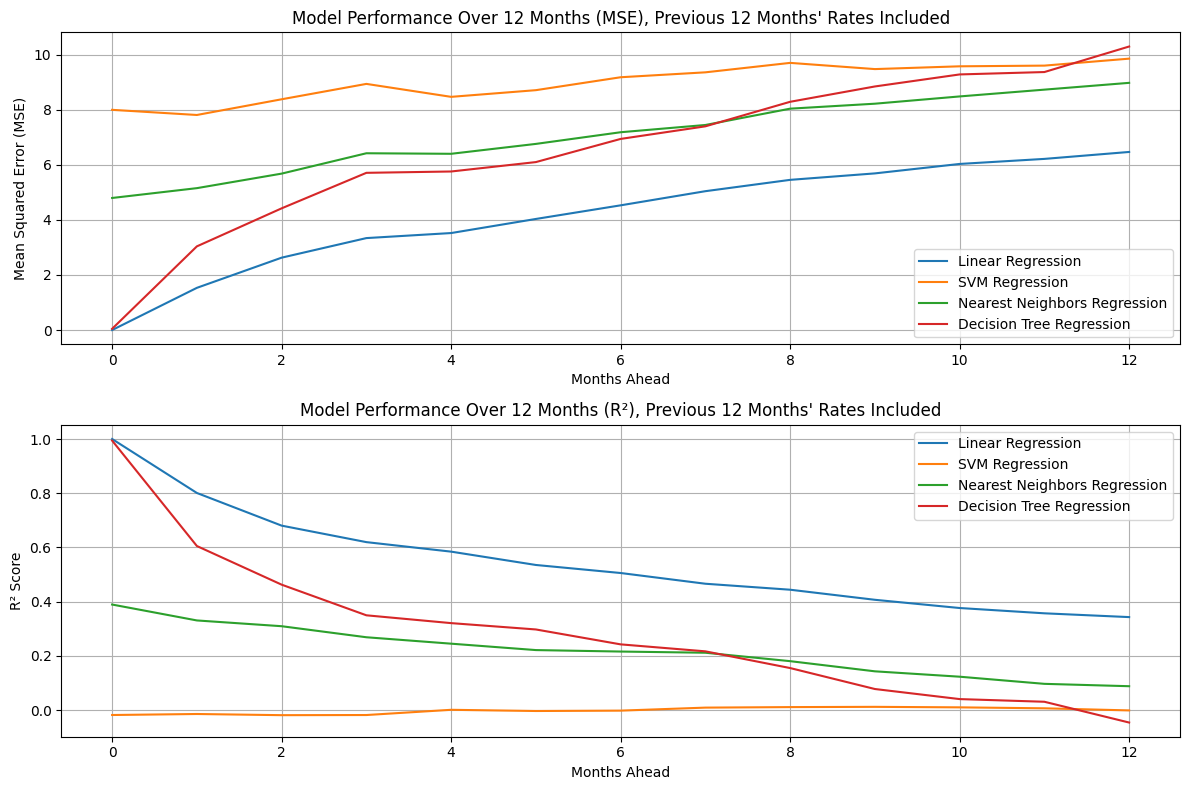

In [103]:
plt.figure(figsize=(12, 8))
months = list(range(0, 13))  # current to 12 months later

# Models to exclude from plots
excluded_models = ["Stochastic Gradient Regression"]

# Plot MSE for each model
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
for model_name, mse_values in mse_results_12_prev.items():
    if model_name not in excluded_models:
        plt.plot(months, mse_values, label=model_name)
plt.title("Model Performance Over 12 Months (MSE), Previous 12 Months' Rates Included")
plt.xlabel("Months Ahead")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.grid()

# Plot R² for each model
plt.subplot(2, 1, 2)
for model_name, r2_values in r2_results_12_prev.items():
    if model_name not in excluded_models:
        plt.plot(months, r2_values, label=model_name)
plt.title("Model Performance Over 12 Months (R²), Previous 12 Months' Rates Included")
plt.xlabel("Months Ahead")
plt.ylabel("R² Score")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


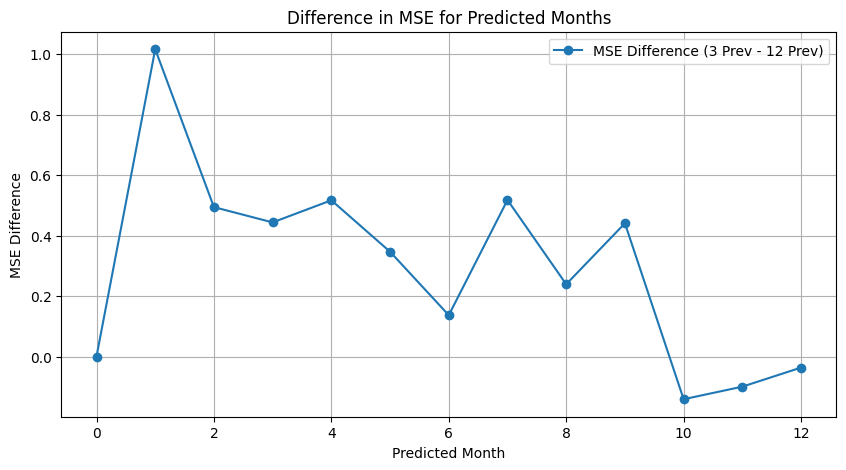

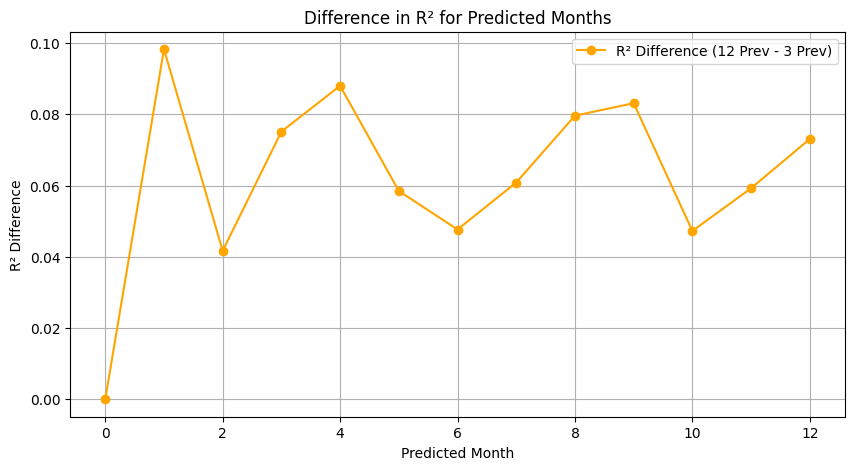

In [104]:
months = list(range(0, 13))  # current to 12 months later

# Calculate differences
mse_diff = []
r2_diff = []

for i in range(0, len(mse_results_12_prev["Linear Regression"])):
    diff = mse_results_no_prev["Linear Regression"][i] - mse_results_12_prev["Linear Regression"][i] # want MSE to go down
    mse_diff.append(diff)

for i in range(0, len(r2_results_12_prev["Linear Regression"])):
    diff = r2_results_12_prev["Linear Regression"][i] - r2_results_no_prev["Linear Regression"][i] # want r^2 to go up
    r2_diff.append(diff)

# plot MSE differences
plt.figure(figsize=(10, 5))
plt.plot(months, mse_diff, marker='o', label='MSE Difference (3 Prev - 12 Prev)')
plt.title('Difference in MSE for Predicted Months')
plt.xlabel('Predicted Month')
plt.ylabel('MSE Difference')
plt.grid(True)
plt.legend()
plt.show()

# plot R² differences
plt.figure(figsize=(10, 5))
plt.plot(months, r2_diff, marker='o', label='R² Difference (12 Prev - 3 Prev)', color='orange')
plt.title('Difference in R² for Predicted Months')
plt.xlabel('Predicted Month')
plt.ylabel('R² Difference')
plt.grid(True)
plt.legend()
plt.show()



## Office hours notes:
- many other factors at play
- amount of data
- correlation analysis
- why we didn't see correlation (is it because there's no correlation or because there are too many other factors at play; expect to have some impact just more influenced by other factors)
- to what extent can we identify potential impact but is masked by other factors
- fires still happening but number of fires/size is still small relative to other factors
-